In [1]:
# https://www.kaggle.com/nilimajauhari/glassdoor-analyze-gender-pay-gap

# Gender pay gap study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set_theme()
plt.style.use('ggplot')
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(12,8)

In [3]:
# load and read data

pay = pd.read_csv('glassdoor_gender_pay_gap.csv')

In [4]:
# brief summary of data

pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
# brief overview of columns

pay.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [6]:
# convert column names to lower case

pay.columns = pay.columns.map(lambda x: x.lower())

In [7]:
# brief overview of column names

pay.columns

Index(['jobtitle', 'gender', 'age', 'perfeval', 'education', 'dept',
       'seniority', 'basepay', 'bonus'],
      dtype='object')

In [8]:
# brief overview of first 5 rows of data

pay.head()

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [9]:
# value counts of all unique values of jobtitle

pay.jobtitle.value_counts()

Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: jobtitle, dtype: int64

In [43]:
pay.gender.value_counts()

Male      532
Female    468
Name: gender, dtype: int64

### This is the evidence that our company's gender pay gap is huge.

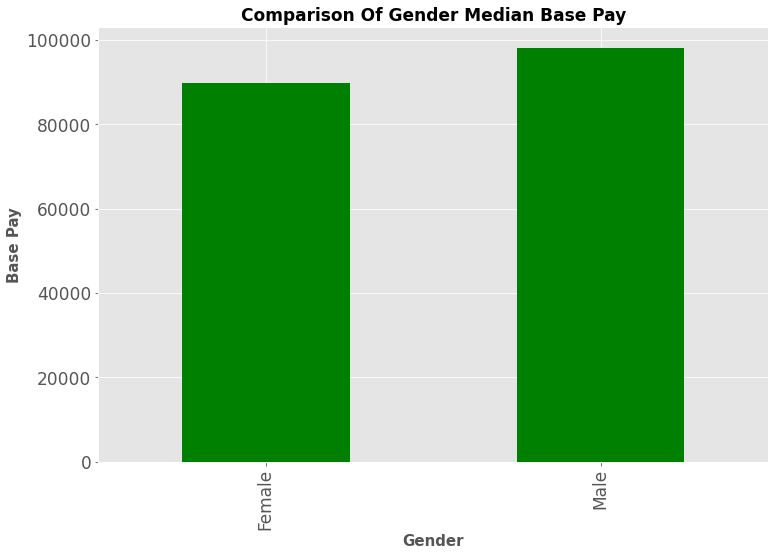

In [10]:
# Visualizing the gender pay gap with median basepay

pay.groupby('gender')['basepay'].median().plot(kind='bar', color='g');
plt.xlabel('Gender', fontsize=15, fontweight='bold');
plt.ylabel('Base Pay', fontsize=15, fontweight='bold');
plt.xticks(fontsize=17);
plt.yticks(fontsize=17);
plt.title('Comparison Of Gender Median Base Pay', fontsize=17, fontweight='bold');

### Is the gender pay gap significant?  We will do a hypothesis testing to determine whether the pay gap is significant or not.
#### Null hypothesis: there are no gender pay gap
#### Alternative hypothesis: there is gender pay gap

In [11]:
# compute differences in average gender pay gap represented by p-value

a = pay.loc[pay['gender']=='Female','basepay']
b = pay.loc[pay['gender']=='Male','basepay']

t,p = stats.ttest_ind(a,b)
print(f" The P Value is: {p}, we reject null hypothesis.")

 The P Value is: 9.478621943012633e-08, we reject null hypothesis.


### Since the P value is < 0.05, we will reject the null hypothesis, and determine that the gender pay gap is significant, and cannot be dismissed as a myth!

### The gender pay gap is 8.46% or USD8,300 a year.

In [12]:
# computing the gender pay gap

gender_pay_both = pay.groupby('gender')['basepay'].median()
fem_pay = gender_pay_both.loc['Female']
mal_pay = gender_pay_both.loc['Male']

pay_diff = round(((mal_pay - fem_pay) / (mal_pay))*100,2)
print(f"The gender pay gap is {pay_diff}%")
print(f".....speaking of which the difference is ${mal_pay-fem_pay} a year")
print(f"The median basepay for female is ${fem_pay}")
print(f"The median basepay for male is ${mal_pay}....which is quite a big gap.")

The gender pay gap is 8.46%
.....speaking of which the difference is $8309.5 a year
The median basepay for female is $89913.5
The median basepay for male is $98223.0....which is quite a big gap.


### Let's try it out.....I am a Graphic Designer with a PhD and 41 years old...

The gender pay gap based on your context is -31.3%


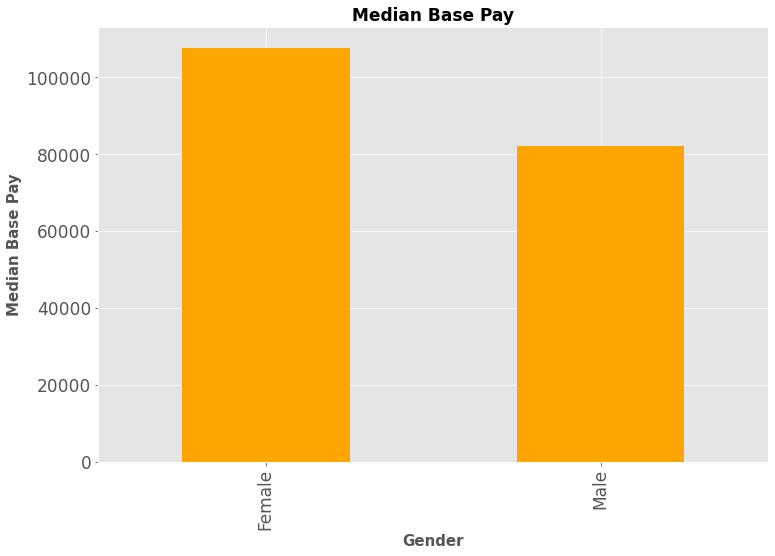

In [13]:
# I am a Data Scientist with a Masters Degree and 41 years old. Compute median gender pay gap.

yours = (pay['jobtitle']=='Graphic Designer') & (pay['education']=='PhD') & (pay['age']>=35) & (pay['age']<=54)

your_pay = pay[yours].groupby('gender')['basepay'].median()

your_pay_gap = ((your_pay.loc['Male']-your_pay.loc['Female'])/your_pay.loc['Male'])*100

print(f"The gender pay gap based on your context is {your_pay_gap:.1f}%")

# plot the chart
pay[yours].groupby('gender')['basepay'].median().plot.bar(color='orange');
plt.xlabel('Gender', fontsize=15, fontweight='bold');
plt.ylabel('Median Base Pay', fontsize=15, fontweight='bold');
plt.xticks(fontsize=17);
plt.yticks(fontsize=17);
plt.title('Median Base Pay', fontsize=17, fontweight='bold');

### I am a Financial Analyst with a High School education and 41 years old

The gender pay gap based on your context is -31.7%


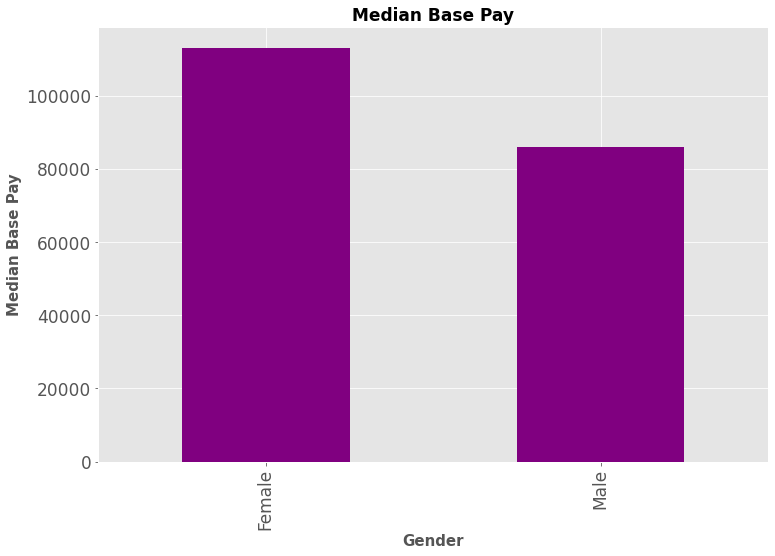

In [14]:
# I am a Financial Analyst with a High School education and 38 years old. Compute median gender pay gap.

yours = (pay['jobtitle']=='Financial Analyst') & (pay['education']=='High School') & (pay['age']>=35) & (pay['age']<=54)

your_pay = pay[yours].groupby('gender')['basepay'].median()

your_pay_gap = ((your_pay.loc['Male']-your_pay.loc['Female'])/your_pay.loc['Male'])*100

print(f"The gender pay gap based on your context is {your_pay_gap:.1f}%")

# plot the chart
pay[yours].groupby('gender')['basepay'].median().plot.bar(color='purple');
plt.xlabel('Gender', fontsize=15, fontweight='bold');
plt.ylabel('Median Base Pay', fontsize=15, fontweight='bold');
plt.xticks(fontsize=17);
plt.yticks(fontsize=17);
plt.title('Median Base Pay', fontsize=17, fontweight='bold');

### I am working in Warehouse Associate with a College and 50 years old

The gender pay gap based on your context is -9.9%


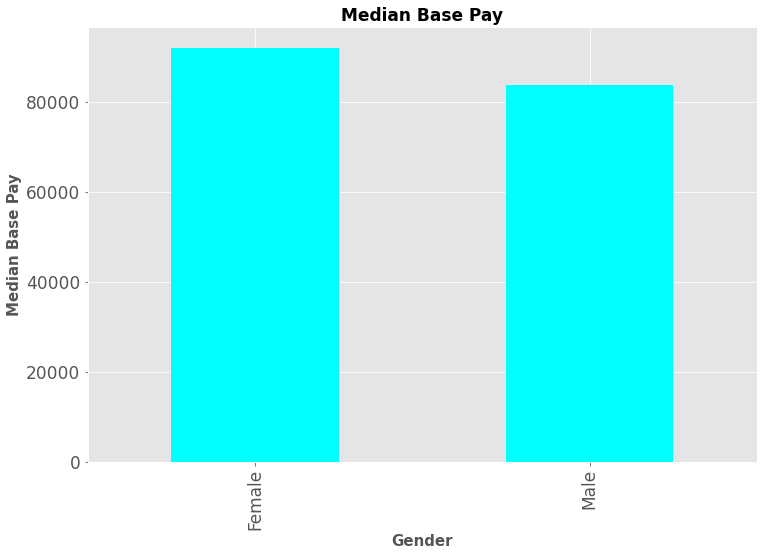

In [15]:
# I am working in IT with PhD and 50 years old. Compute median gender pay gap.

yours = (pay['jobtitle']=='Warehouse Associate') & (pay['education']=='College') & (pay['age']>=35) & (pay['age']<=54)

your_pay = pay[yours].groupby('gender')['basepay'].median()

your_pay_gap = ((your_pay.loc['Male']-your_pay.loc['Female'])/your_pay.loc['Male'])*100

print(f"The gender pay gap based on your context is {your_pay_gap:.1f}%")

# plot the chart
pay[yours].groupby('gender')['basepay'].median().plot.bar(color='cyan');
plt.xlabel('Gender', fontsize=15, fontweight='bold');
plt.ylabel('Median Base Pay', fontsize=15, fontweight='bold');
plt.xticks(fontsize=17);
plt.yticks(fontsize=17);
plt.title('Median Base Pay', fontsize=17, fontweight='bold');

In [16]:
# import LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [17]:
# labelencode gender and jobtitle

le = LabelEncoder()
pay['gender_le'] = le.fit_transform(pay.gender)
pay['jobtitle_le'] = le.fit_transform(pay.jobtitle)
pay['education_le'] = le.fit_transform(pay.education)

In [18]:
# review

pay.head()

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus,gender_le,jobtitle_le,education_le
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,0,3,0
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,1,8,0
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,0,9,3
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,1,8,2
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,1,3,2


In [19]:
# ordering the charts by basepay and assigning it to order_by_basepay

order_by_basepay = pay.groupby('jobtitle')['basepay'].median().sort_values(ascending=False).index

### We need to do further examination to determine the reason for gender pay gap

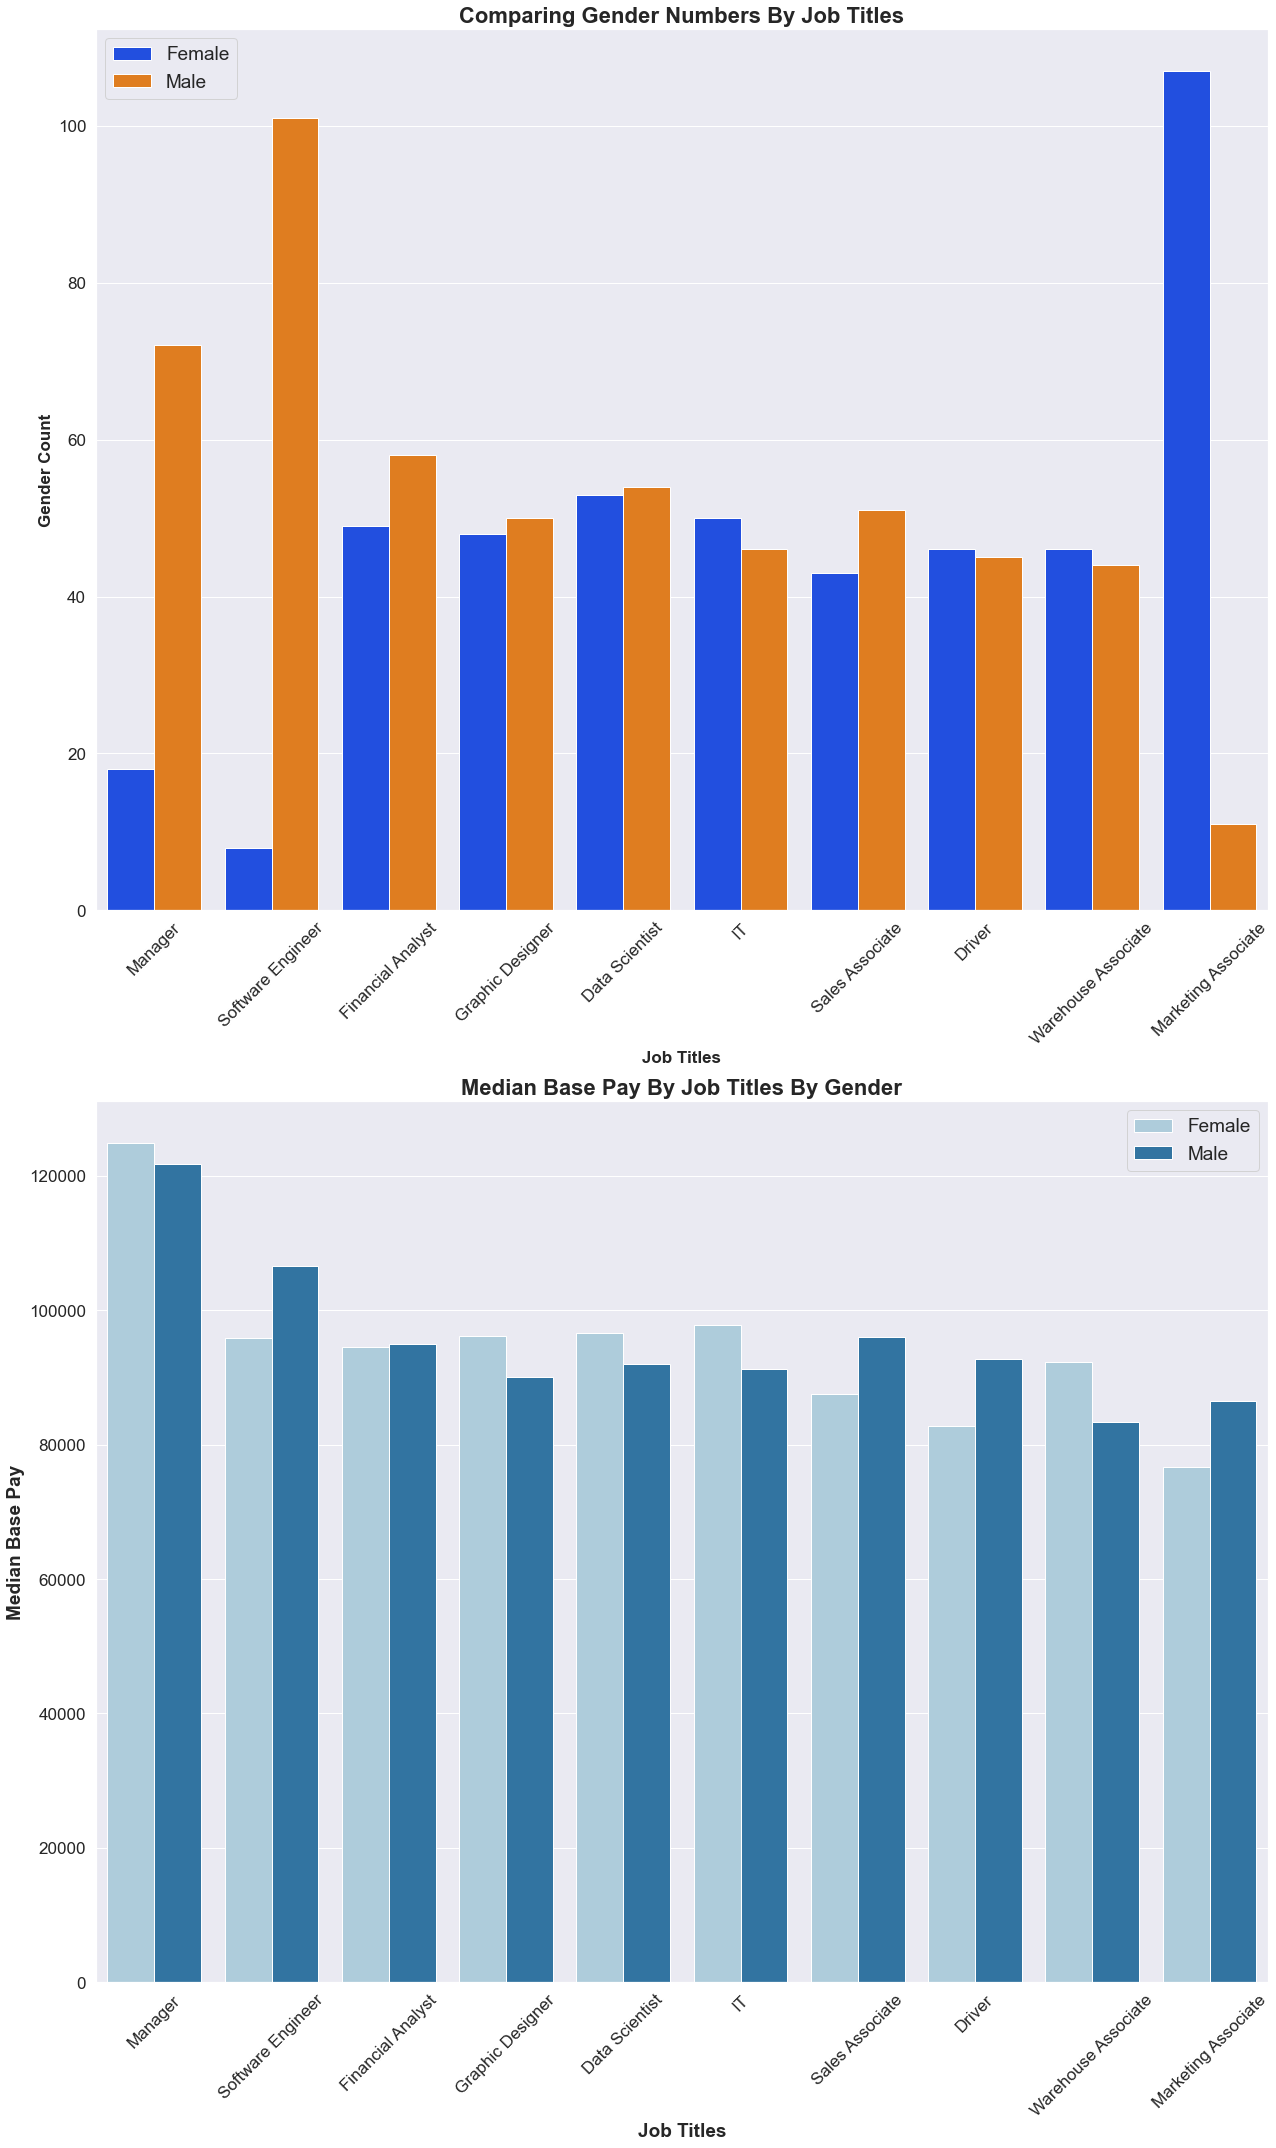

In [20]:
# plot total number of males and females by job titles

sns.set_theme()
fig = plt.gcf()
fig.set_size_inches(18,30)
plt.subplot(2,1,1) # subplot

sns.countplot(data=pay, x='jobtitle', hue='gender', palette='bright', order = order_by_basepay );
locs, labels = plt.xticks();  # plotting the graph (ie. the number of job title entries)

plt.setp(labels, rotation=45, fontsize=14);
plt.xlabel('Job Titles', fontsize=17, fontweight='bold');
plt.ylabel('Gender Count', fontsize=17, fontweight='bold');
plt.xticks(fontsize=17);
plt.yticks(fontsize=17);
plt.legend(['Female','Male'], fontsize=19)
plt.title('Comparing Gender Numbers By Job Titles', fontsize=22, fontweight='bold');


plt.subplot(2,1,2) # subplot
sns.barplot(data=pay, x='jobtitle', y='basepay', hue='gender', estimator=np.median, ci=None, order = order_by_basepay,\
           palette='Paired'); # plot the graph

locs, labels = plt.xticks();
plt.setp(labels, rotation=45 , fontsize=14);
plt.xlabel('Job Titles', fontsize=19, fontweight='bold');
plt.ylabel('Median Base Pay', fontsize=19, fontweight='bold');
plt.xticks(fontsize=17);
plt.yticks(fontsize=17);
plt.legend(['Female','Male'], fontsize=19)
plt.title('Median Base Pay By Job Titles By Gender', fontsize=22, fontweight='bold');

plt.tight_layout()
plt.show()

### By close examination of the data, we can see that the first 5 most highly paid jobs has males than females.  This shows occupational segregation by the dominant male group which is one of the reason for gender pay gap.  This is a sign of occupation segregation which leads to gender pay gap.  Therefore we need to do some adjustments to compare base pay based on the same age group, education, job titles etc.

In [21]:
# we will do a gender pay comparison based on these 7 occupations where there is a more balanced participation in 
# both genders


# requirements

jt = ['Data Scientist', 'Graphic Designer', 'Warehouse Associate','Sales Associate', 'Financial Analyst',\
     'Driver','IT']
edu = ['PhD', 'Masters','College','High School']
start_age = 35
end_age = 54

sum = []

for w in jt:
    for k in edu:
        Req1 = (pay['jobtitle']== w) & (pay['education']==k) & (pay['age']>=start_age) & (pay['age']<=end_age)
        Req_1_compare = pay[Req1].groupby('gender')['basepay'].median()
        b = ((Req_1_compare.loc['Male'] - Req_1_compare.loc['Female'])/(Req_1_compare.loc['Male'])*100)
        
        # casting a dictionary to consolidate info
        
        case = {'jobtitle': w, 'education': k ,'diff_in_median_pay': b}
        sum.append(case)
        
summary = pd.DataFrame(sum, columns=['jobtitle','education','diff_in_median_pay'])
summary
        

,jobtitle,education,diff_in_median_pay
0,Data Scientist,PhD,3.048588
1,Data Scientist,Masters,3.827348
2,Data Scientist,College,-0.549784
3,Data Scientist,High School,17.974746
4,Graphic Designer,PhD,-31.288616
5,Graphic Designer,Masters,28.797844
6,Graphic Designer,College,15.855085
7,Graphic Designer,High School,0.709949
8,Warehouse Associate,PhD,-22.865556
9,Warehouse Associate,Masters,6.936467


In [22]:
# # average gap in median gender pay 

# summary.groupby('jobtitle')['diff_in_median_pay'].mean().plot.bar(color='olive');
# plt.xlabel('Job Title', fontsize=15, fontweight='bold');
# plt.ylabel('Differences In Gender Base Pay', fontsize=15, fontweight='bold');
# plt.xticks(fontsize=12);
# plt.yticks(fontsize=12);
# plt.title('Differences In Gender Median basepay', fontsize=17, fontweight='bold');

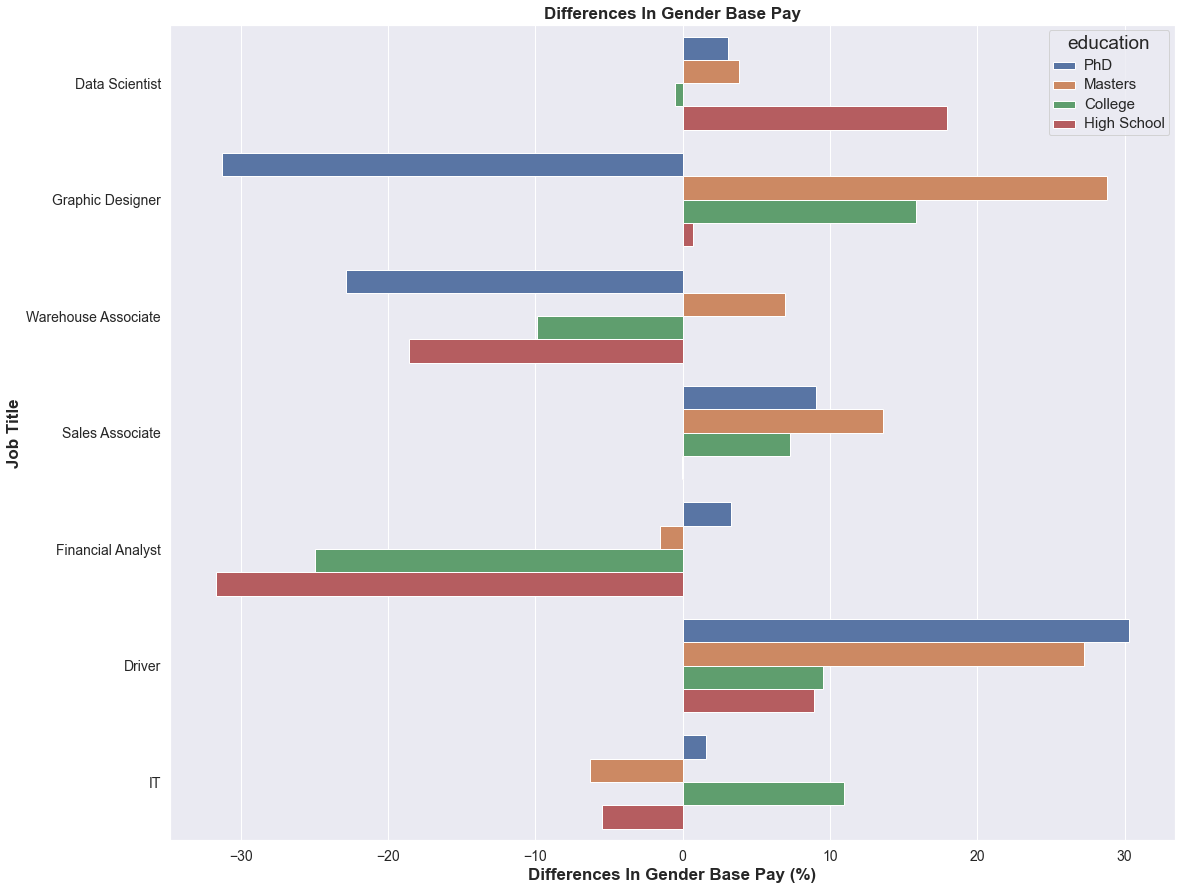

In [23]:
# average gap by jobtitle and education

fig = plt.gcf()
fig.set_size_inches(18,15)

ax = sns.barplot(data = summary, y='jobtitle', x='diff_in_median_pay', hue='education');
plt.xlabel('Differences In Gender Base Pay (%)', fontsize=17, fontweight='bold');
plt.ylabel('Job Title', fontsize=17, fontweight='bold');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='19')
#plt.legend(['PhD','Masters','College','High School'], fontsize=10)
plt.title('Differences In Gender Base Pay', fontsize=17, fontweight='bold');

### Build a new dataframe consisting of occupations which have a fair participation from both genders. ie. there is no occupation segreggations.

In [24]:
# build a dataframe consisting of occupations which have a EQUAL participation of both genders

new_criteria = ((pay['jobtitle']!='Software Engineer') & \
                (pay['jobtitle']!='Manager') & \
                (pay['jobtitle']!='Marketing Associate'))

adjusted_jobtitle = pay[new_criteria]

### Test whether there is significance difference in gender pay

In [25]:
# p value 
# Null hypothesis: There is no difference in the gender base pay
# Alternative hypothesis: There is significant difference in gender base pay


Xfem = adjusted_jobtitle.loc[adjusted_jobtitle['gender']=='Female','basepay']
Xmale = adjusted_jobtitle.loc[adjusted_jobtitle['gender']=='Male','basepay']

t,p = stats.ttest_ind(Xfem,Xmale)
print(f"The P Value is: {p:.2f}, we fail to reject null hypothesis.")
print('There is no significant difference in the adjusted gender base pay gap');

The P Value is: 0.55, we fail to reject null hypothesis.
There is no significant difference in the adjusted gender base pay gap


## Let's play a game.....

In [26]:
# import Logistic Regression & initiate it

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#import sklearn confusion matrix

from sklearn.metrics import confusion_matrix

In [27]:
# using KFold split to initialize 10 run attempts 

from sklearn.model_selection import KFold

X = adjusted_jobtitle.loc[:,['basepay','education_le','jobtitle_le','age']]
y = adjusted_jobtitle['gender_le']
t=10
kf = KFold(n_splits=t, random_state=4, shuffle=True)


### What's the outcome of the game?

In [40]:
# fit the Logistic Regression model and predict the score
# initialize kfold split

acc = []

# prediction part
for train, test in kf.split(X): # rotating indexes
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    # fit data into Logistic Regression model and predict
    lr.fit(X_train, y_train) 
    y_pred = lr.predict(X_test)  
    
    # accumulate average accuracy score of every run
    acc.append(round(np.mean(y_pred==y_test),2)) 
    
# calculate accuracy scores > 0.5
result = len([k for k in acc if k > 0.5]) 

# calculate average accuracy of score of all 10 runs
acc_avg = (np.sum(acc)/len(acc))*100  

# print them out!
print(f"There are {10-result} out of {t} attempts which AI fails to identify the genders.")
print(f"The accuracy score of all {t} attempts are: {acc}")
print(f"The average accuracy score is {acc_avg}%")

There are 6 out of 10 attempts which AI fails to identify the genders.
The accuracy score of all 10 attempts are: [0.43, 0.54, 0.51, 0.56, 0.54, 0.41, 0.47, 0.4, 0.5, 0.44]
The average accuracy score is 48.0%


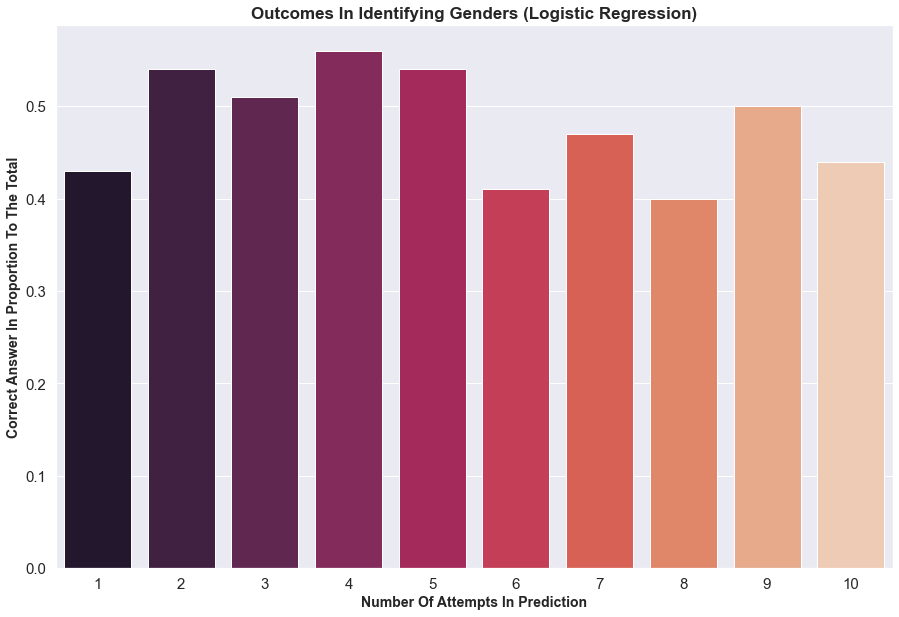

In [29]:
# plot the graph to show all the outcomes of prediction

plt.figure(figsize=(15,10))

attempts = np.arange(1,len(acc)+1)
sns.barplot(x=attempts, y=acc, palette='rocket');
plt.title('Outcomes In Identifying Genders (Logistic Regression)', fontsize=17, fontweight='bold');
plt.xlabel('Number Of Attempts In Prediction' , fontsize=14, fontweight='bold');
plt.ylabel('Correct Answer In Proportion To The Total', fontsize=14, fontweight='bold');
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

### What is the adjusted gender pay gap then?

The adjusted pay gap is 0.65%. Women's median pay is higher than men's!


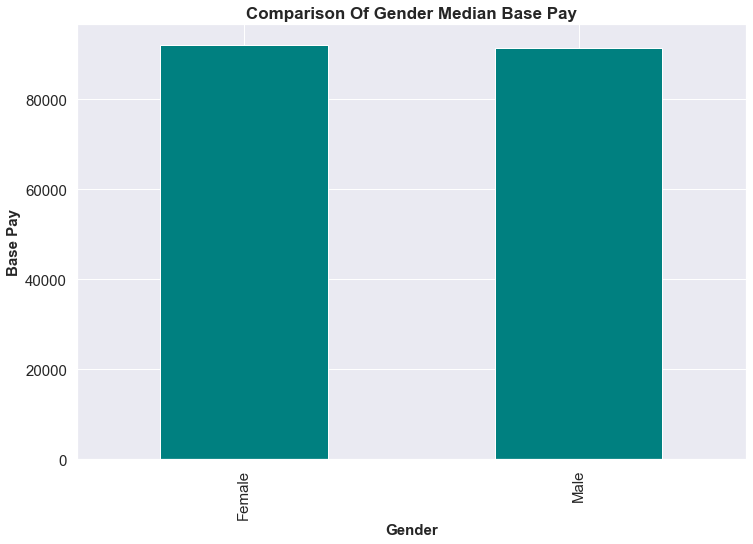

In [30]:
# Visualizing the gender pay gap with median basepay

sns.set_theme()
adjusted_jobtitle.groupby('gender')['basepay'].median().plot.bar(color='teal');
plt.xlabel('Gender', fontsize=15, fontweight='bold');
plt.ylabel('Base Pay', fontsize=15, fontweight='bold');
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title('Comparison Of Gender Median Base Pay', fontsize=17, fontweight='bold');

# compute the adjusted gender pay gap in percentage
fem_adjust_pay = adjusted_jobtitle.groupby('gender')['basepay'].median().loc['Female']
male_adjust_pay = adjusted_jobtitle.groupby('gender')['basepay'].median().loc['Male']

adjusted_pay_gap = abs(((male_adjust_pay - fem_adjust_pay) / male_adjust_pay)*100)

print(f"The adjusted pay gap is {adjusted_pay_gap:.2f}%. Women's median pay is higher than men's!")

In [31]:
_=adjusted_jobtitle.groupby('gender')['basepay'].median().loc['Female']
print(f"The median pay for women is ${_} per annum")

The median pay for women is $92067.0 per annum


In [32]:
_=adjusted_jobtitle.groupby('gender')['basepay'].median().loc['Male']
print(f"The median pay for men is ${_} per annum")

The median pay for men is $91475.5 per annum


# Thank You!

## This part not for stakeholders!

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report

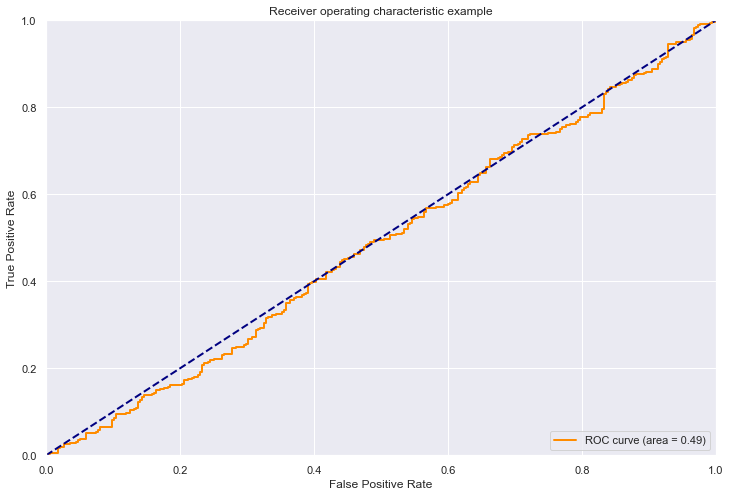

In [37]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict

y_preds = lr.predict_proba(X)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, thresholds  = roc_curve(y, y_preds)


# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y, y_preds)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [38]:
print(f"The area under the ROC curve is {auc}")


The area under the ROC curve is 0.4872362326299537


In [39]:
y_pred = lr.predict(X)
report = classification_report(y, y_pred)
print("classification report: \n", report)

classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       0.51      1.00      0.68       348

    accuracy                           0.51       683
   macro avg       0.25      0.50      0.34       683
weighted avg       0.26      0.51      0.34       683



In [42]:
X.shape

(683, 4)